In [131]:
import torch
import torch.nn as nn
%pylab inline
from tqdm import trange

Populating the interactive namespace from numpy and matplotlib


In [16]:
def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join("./tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [14]:
import hashlib
url = "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
hashlib.md5(url.encode('utf-8')).hexdigest()

'23278f029ff68f1e993776e500ce06b9'

In [38]:
class bobnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x


loss 0.09 accuracy 0.97: 100%|████████████████████████████████████| 1000/1000 [00:05<00:00, 199.76it/s]


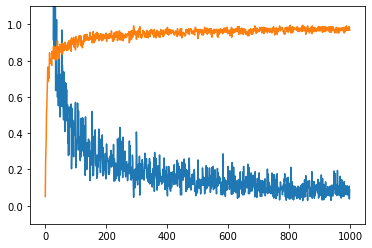

In [154]:
model = bobnet()
BS = 256
losses,accur = [],[]
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
for i in (w := trange(1000)):
    samp = np.random.randint(0, X_train.shape[0], size=(BS))
    X = torch.tensor(X_train[samp].reshape((-1, 28*28))).float()
    Y = torch.tensor(Y_train[samp]).long()
    optim.zero_grad()
    out = model(X)
    loss = loss_function(out, Y)
    loss.backward()
    optim.step()
    losses.append(loss.item())
    cat = torch.argmax(out, dim=1)
    accuracy = (cat == Y).float().mean()
    accur.append(accuracy.item())
    w.set_description("loss %.2f accuracy %.2f" % (loss.item(), accuracy.item()))

plt.ylim(-.1,1.1)
plot(losses)
plot(accur)

(-0.1, 1.1)

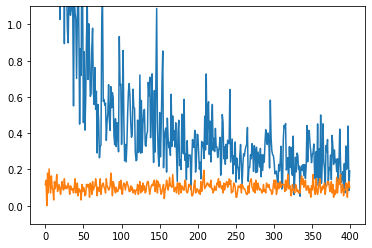

In [90]:
model(torch.tensor(X_train[0].reshape((-1, 28*28))).float())

tensor([[-25.7364, -62.7322, -68.5897,  -8.0852, -82.6092,  27.9094, -24.8004,
         -67.4928, -26.7425, -20.6895]], grad_fn=<AddmmBackward0>)

(<matplotlib.image.AxesImage at 0x270090a43d0>, 5)

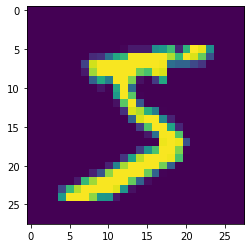

In [20]:
imshow(X_train[0]),Y_train[0]

In [54]:
samp = np.random.randint(0, X_train.shape[0], size=(32))
samp

array([35311, 39699, 26171, 46210, 17314, 43029, 37320, 39421, 58806,
       29027, 21664, 35228, 14039,  9742, 57421, 19143, 41468, 28862,
       16441, 26485, 49776, 36587, 43100, 58419, 47310, 56265, 25698,
       58223,  5034,  6004, 35192, 58064])

In [105]:
a = X_train[0].reshape(-1, 28*28)
b = X_train[0].reshape(2, (28*28)//2)

In [136]:
for i in range(10,30):
    a = model(torch.tensor(X_train[i].reshape((-1, 28*28))).float())
    print((torch.argmax(a) == Y_train[i]).float().mean())

tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(0.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
